In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive'

 Classroom
'Colab Notebooks'
 fr_test.rar
 fr_train.rar
'Implement and Demonstrate the FIND-S Algorithm. T....gsheet'
'Pitching Slide InflAItion.pdf'
'Red and Black Thin Geometric Lines Financial Tips Finance Presentation.pdf'
'Technical Presentation InflAItion.pdf'
'Доклад (1).gdoc'
'Доклад (2).gdoc'
'Доклад (3).gdoc'
'Доклад (4).gdoc'
 Доклад.gdoc
 Ежедневник.gsheet
 ЕрмуратовЕрназарЕрболулы.docx
'Круговые диаграммы по об.промышленности.pbix'
'Новая форма.gform'
'Ссылка на гитхаб с файлами (1).docx'
'Ссылка на гитхаб с файлами (2).docx'
'Ссылка на гитхаб с файлами.docx'
'Техническая презентация InflAItion.pdf'
'Трек Smart City.gdoc'


In [ ]:
# Install unrar if not already installed
!sudo apt-get install unrar

# Extract fr_train.rar to a directory
!unrar x '/content/fr_train.rar' '/content/fr_train/'

# Extract fr_test.rar to a directory
!unrar x '/content/fr_test.rar' '/content/fr_test/'

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracting  /content/fr_train/bread_pudding/1101908.jpg                   87%  OK 
Extracting  /content/fr_train/bread_pudding/110307.jpg                    87%  OK 
Extracting  /content/fr_train/bread_pudding/1104616.jpg                   87%  OK 
Extracting  /content/fr_train/bread_pudding/1105435.jpg                   87%  OK 
Extracting  /content/fr_train/bread_pudding/1105517.jpg                   87%  OK 
Extracting  /content/fr_train/bread_pudding/1105525.jpg                   87%  OK 
Extracting  /content/fr_train/bread_pudding/1105735.jpg                   88%  OK 
Extracting  /content/fr_train/bread_pudding/1107791.jpg                   88%  OK 
Extracting  /content/fr_train/bread_pudding/1112313.jpg                   88%  OK 
Extracting  /content/fr_train/bread_pudding/1119079.jpg                   88%  OK 
Extracting  

In [ ]:
!ls '/content/fr_train/'

!ls '/content/fr_test/'

apple_pie	beef_tartare   breakfast_burrito  carrot_cake		sushi
baby_back_ribs	beignets       caesar_salad	  spaghetti_bolognese	tacos
baklava		bibimbap       cannoli		  steak			tiramisu
beef_carpaccio	bread_pudding  caprese_salad	  strawberry_shortcake	waffles
apple_pie_test	     beignets_test	     cannoli_test	       strawberry_shortcake_test
baby_back_ribs_test  bibimbap_test	     carpese_salad_test        sushi_test
baklava_test	     bread_pudding_test      carrot_cake_test	       tacos_test
beef_carpaccio_test  breakfast_burrito_test  spaghetti_bolognese_test  tiramisu_test
beef_tartare_test    caesar_salad_test	     steak_test		       waffles_test


In [ ]:
import os
import random
import shutil

source_folder = '/content/fr_train/spaghetti_bolognese'
target_folder = '/content/fr_test/spaghetti_bolognese_test'


os.makedirs(target_folder, exist_ok=True)


files = os.listdir(source_folder)


files_to_move = random.sample(files, 600)


for file_name in files_to_move:
    source_path = os.path.join(source_folder, file_name)
    target_path = os.path.join(target_folder, file_name)
    shutil.move(source_path, target_path)

print(f"Moved {len(files_to_move)} files from '{source_folder}' to '{target_folder}'.")
print(f"Remaining files in source folder: {len(os.listdir(source_folder))}")
print(f"Files in target folder: {len(os.listdir(target_folder))}")

Moved 600 files from '/content/fr_train/spaghetti_bolognese' to '/content/fr_test/spaghetti_bolognese_test'.
Remaining files in source folder: 400
Files in target folder: 600


In [ ]:
import os
import random

test_folder = '/content/fr_test/spaghetti_bolognese_test'


test_files = os.listdir(test_folder)


files_to_remove = random.sample(test_files, 400)

for file_name in files_to_remove:
    file_path = os.path.join(test_folder, file_name)
    os.remove(file_path)

print(f"Remaining files in test folder: {len(os.listdir(test_folder))}")

Remaining files in test folder: 200


In [ ]:
print(f"Total files in spaghetti_bolognese (train): {len(os.listdir(source_folder))}")
print(f"Total files in spaghetti_bolognese_test (test): {len(os.listdir(test_folder))}")

Total files in spaghetti_bolognese (train): 400
Total files in spaghetti_bolognese_test (test): 200


Dataset illustration

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_dir = '/content/fr_train'
test_dir = '/content/fr_test'

calories_per_100g = {
    "apple_pie": 265, "baby_back_ribs": 381, "baklava": 428, "beef_tartare": 157,
    "bread_pudding": 350, "caesar_salad": 188, "caprese_salad": 142, "strawberry_shortcake": 274,
    "cannoli": 254, "waffles": 310, "breakfast_burrito": 225, "sushi": 157,
    "beef_carpaccio": 168, "spaghetti_bolognese": 260, "tiramisu": 283,
    "carrot_cake": 310, "steak": 230, "beignets": 399, "bibimbap": 146, "tacos": 216
}

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transforms = train_transforms

class CalorieDataset(Dataset):
    def __init__(self, image_folder_dataset, calorie_dict):
        self.dataset = image_folder_dataset
        self.calorie_dict = calorie_dict


        self.class_to_calories = {}
        for folder_name, idx in self.dataset.class_to_idx.items():
            cleaned_name = folder_name.replace("_test", "").replace(" ", "")
            if cleaned_name in calorie_dict:
                self.class_to_calories[idx] = calorie_dict[cleaned_name]
            elif "carpese" in cleaned_name:  # Handle typo correction
                self.class_to_calories[idx] = calorie_dict["caprese_salad"]
            else:
                raise KeyError(f"No calorie value found for folder: '{folder_name}'")

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, class_label = self.dataset[idx]
        calorie_label = self.class_to_calories[class_label]
        return image, class_label, calorie_label

In [ ]:
train_full_dataset = CalorieDataset(datasets.ImageFolder(train_dir, transform=train_transforms), calories_per_100g)
test_dataset = CalorieDataset(datasets.ImageFolder(test_dir, transform=test_transforms), calories_per_100g)


val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_full_dataset))
val_size = len(train_full_dataset) - train_size
train_dataset, val_dataset = random_split(train_full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

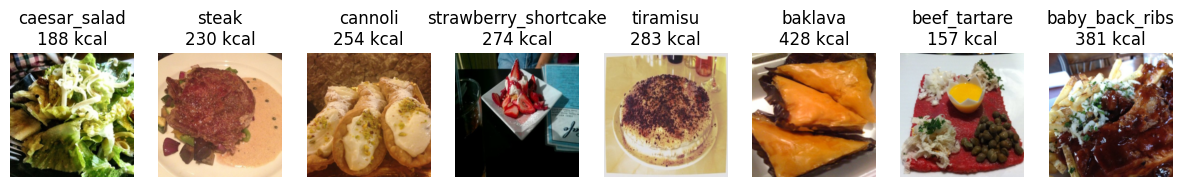

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, labels, calories, class_names, num_images=8):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        image = images[i].permute(1, 2, 0).numpy()
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)

        plt.imshow(image)
        plt.title(f"{class_names[labels[i]]}\n{calories[i]:.0f} kcal")
        plt.axis("off")
    plt.show()

images, labels, calories = next(iter(train_loader))

class_names = train_loader.dataset.dataset.dataset.classes


show_images(images, labels, calories, class_names)

Baseline model: models.efficientnet_b0

In [ ]:
batch_size = 64
num_epochs = 10
learning_rate = 0.00001

class CalorieDataset(Dataset):
    def __init__(self, image_folder_dataset, calorie_dict):
        self.dataset = image_folder_dataset
        self.calorie_dict = calorie_dict


        self.class_to_calories = {}
        for folder_name, idx in self.dataset.class_to_idx.items():
            cleaned_name = folder_name.replace("_test", "").replace(" ", "")
            if cleaned_name in calorie_dict:
                self.class_to_calories[idx] = calorie_dict[cleaned_name]/100
            elif "carpese" in cleaned_name:  # Handle typo correction
                self.class_to_calories[idx] = calorie_dict["caprese_salad"]/100
            else:
                raise KeyError(f"No calorie value found for folder: '{folder_name}'")

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, class_label = self.dataset[idx]
        calorie_label = self.class_to_calories[class_label]
        return image, class_label, calorie_label

train_full_dataset = CalorieDataset(datasets.ImageFolder(train_dir, transform=train_transforms), calories_per_100g)
test_dataset = CalorieDataset(datasets.ImageFolder(test_dir, transform=test_transforms), calories_per_100g)


val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_full_dataset))
val_size = len(train_full_dataset) - train_size
train_dataset, val_dataset = random_split(train_full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class FoodCalorieClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FoodCalorieClassifier, self).__init__()
        self.features = models.efficientnet_b0(pretrained=True)
        in_features = self.features.classifier[1].in_features


        self.features.classifier = nn.Identity()


        self.classifier = nn.Linear(in_features, num_classes)
        self.calorie_predictor = nn.Linear(in_features, 1)

    def forward(self, x):
        x = self.features(x)
        class_output = self.classifier(x)
        calorie_output = self.calorie_predictor(x)
        return class_output, calorie_output


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(calories_per_100g)
model = FoodCalorieClassifier(num_classes=num_classes).to(device)
model = model.to(device)


criterion_class = nn.CrossEntropyLoss()
criterion_calorie = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
for epoch in range(num_epochs):
    model.train()
    running_class_loss, running_calorie_loss = 0.0, 0.0
    all_preds, all_labels = [], []

    for images, labels, calories in train_loader:
        images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)


        class_outputs, calorie_outputs = model(images)


        class_loss = criterion_class(class_outputs, labels)
        calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)
        loss = class_loss + 0.01 * calorie_loss


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        running_class_loss += class_loss.item()
        running_calorie_loss += calorie_loss.item()
        _, preds = torch.max(class_outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Class Loss: {running_class_loss / len(train_loader):.4f}, Calorie Loss: {running_calorie_loss / len(train_loader):.4f}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


def evaluate_model(model, data_loader, criterion_class, criterion_calorie):
    model.eval()
    all_preds, all_labels, all_calories, all_calorie_preds = [], [], [], []
    running_class_loss, running_calorie_loss = 0.0, 0.0

    with torch.no_grad():
        for images, labels, calories in data_loader:
            images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)
            class_outputs, calorie_outputs = model(images)

            class_loss = criterion_class(class_outputs, labels)
            calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)

            running_class_loss += class_loss.item()
            running_calorie_loss += calorie_loss.item()

            _, preds = torch.max(class_outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_calories.extend(calories.cpu().numpy())
            all_calorie_preds.extend(calorie_outputs.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f"Validation Class Loss: {running_class_loss / len(data_loader):.4f}, Calorie Loss: {running_calorie_loss / len(data_loader):.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


evaluate_model(model, val_loader, criterion_class, criterion_calorie)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10]
Class Loss: 2.9575, Calorie Loss: 7.4213
Accuracy: 0.0813, Precision: 0.0932, Recall: 0.0784, F1 Score: 0.0774
Epoch [2/10]
Class Loss: 2.8283, Calorie Loss: 6.4052
Accuracy: 0.2247, Precision: 0.2163, Recall: 0.2090, F1 Score: 0.2018
Epoch [3/10]
Class Loss: 2.6643, Calorie Loss: 5.4072
Accuracy: 0.3594, Precision: 0.3442, Recall: 0.3347, F1 Score: 0.3198
Epoch [4/10]
Class Loss: 2.4527, Calorie Loss: 4.4008
Accuracy: 0.4436, Precision: 0.4507, Recall: 0.4184, F1 Score: 0.4044
Epoch [5/10]
Class Loss: 2.2268, Calorie Loss: 3.5216
Accuracy: 0.5061, Precision: 0.5237, Recall: 0.4843, F1 Score: 0.4693
Epoch [6/10]
Class Loss: 2.0141, Calorie Loss: 2.8257
Accuracy: 0.5670, Precision: 0.5887, Recall: 0.5471, F1 Score: 0.5353
Epoch [7/10]
Class Loss: 1.8104, Calorie Loss: 2.2560
Accuracy: 0.6150, Precision: 0.6291, Recall: 0.5981, F1 Score: 0.5893
Epoch [8/10]
Class Loss: 1.6217, Calorie Loss: 1.8219
Accuracy: 0.6582, Precision: 0.6674, Recall: 0.6431, F1 Score: 0.6379
Epoch [9

Data augmentation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

train_dir = '/content/fr_train'
test_dir = '/content/fr_test'
batch_size = 32
num_epochs = 10
learning_rate = 0.0005

calories_per_100g = {
    "apple_pie": 265, "baby_back_ribs": 381, "baklava": 428, "beef_tartare": 157,
    "bread_pudding": 350, "caesar_salad": 188, "caprese_salad": 142, "strawberry_shortcake": 274,
    "cannoli": 254, "waffles": 310, "breakfast_burrito": 225, "sushi": 157,
    "beef_carpaccio": 168, "spaghetti_bolognese": 260, "tiramisu": 283,
    "carrot_cake": 310, "steak": 230, "beignets": 399, "bibimbap": 146, "tacos": 216
}

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


class CalorieDataset(Dataset):
    def __init__(self, image_folder_dataset, calorie_dict):
        self.dataset = image_folder_dataset
        self.calorie_dict = calorie_dict

        self.class_to_calories = {}
        for folder_name, idx in self.dataset.class_to_idx.items():
            cleaned_name = folder_name.replace("_test", "").replace(" ", "")
            if cleaned_name in calorie_dict:
                self.class_to_calories[idx] = calorie_dict[cleaned_name] / 100.0
            elif "carpese" in cleaned_name:
                self.class_to_calories[idx] = calorie_dict["caprese_salad"] / 100.0
            else:
                raise KeyError(f"No calorie value found for folder: '{folder_name}'")

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, class_label = self.dataset[idx]
        calorie_label = self.class_to_calories[class_label]
        return image, class_label, calorie_label


train_full_dataset = CalorieDataset(datasets.ImageFolder(train_dir, transform=train_transforms), calories_per_100g)
test_dataset = CalorieDataset(datasets.ImageFolder(test_dir, transform=test_transforms), calories_per_100g)


val_ratio = 0.2
train_size = int((1 - val_ratio) * len(train_full_dataset))
val_size = len(train_full_dataset) - train_size
train_dataset, val_dataset = random_split(train_full_dataset, [train_size, val_size])


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class FoodCalorieClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FoodCalorieClassifier, self).__init__()
        self.features = models.efficientnet_b0(pretrained=True)
        in_features = self.features.classifier[1].in_features

        self.features.classifier = nn.Identity()

        self.classifier = nn.Linear(in_features, num_classes)
        self.calorie_predictor = nn.Linear(in_features, 1)

    def forward(self, x):
        x = self.features(x)
        class_output = self.classifier(x)
        calorie_output = self.calorie_predictor(x)
        return class_output, calorie_output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


num_classes = len(calories_per_100g)
model = FoodCalorieClassifier(num_classes=num_classes).to(device)


criterion_class = nn.CrossEntropyLoss()
criterion_calorie = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    model.train()
    running_class_loss, running_calorie_loss = 0.0, 0.0
    all_preds, all_labels = [], []

    for images, labels, calories in train_loader:
        images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)

        class_outputs, calorie_outputs = model(images)

        class_loss = criterion_class(class_outputs, labels)
        calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)
        loss = class_loss + 0.01 * calorie_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_class_loss += class_loss.item()
        running_calorie_loss += calorie_loss.item()
        _, preds = torch.max(class_outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Class Loss: {running_class_loss / len(train_loader):.4f}, Calorie Loss: {running_calorie_loss / len(train_loader):.4f}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


def evaluate_model(model, data_loader, criterion_class, criterion_calorie):
    model.eval()
    all_preds, all_labels, all_calories, all_calorie_preds = [], [], [], []
    running_class_loss, running_calorie_loss = 0.0, 0.0

    with torch.no_grad():
        for images, labels, calories in data_loader:
            images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)
            class_outputs, calorie_outputs = model(images)

            class_loss = criterion_class(class_outputs, labels)
            calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)

            running_class_loss += class_loss.item()
            running_calorie_loss += calorie_loss.item()

            _, preds = torch.max(class_outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_calories.extend(calories.cpu().numpy())
            all_calorie_preds.extend(calorie_outputs.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print(f"Validation Class Loss: {running_class_loss / len(data_loader):.4f}, Calorie Loss: {running_calorie_loss / len(data_loader):.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

evaluate_model(model, val_loader, criterion_class, criterion_calorie)

Epoch [1/10]
Class Loss: 1.2410, Calorie Loss: 1.1830
Accuracy: 0.6283, Precision: 0.6289, Recall: 0.6206, F1 Score: 0.6222
Epoch [2/10]
Class Loss: 0.5818, Calorie Loss: 0.5486
Accuracy: 0.8223, Precision: 0.8202, Recall: 0.8195, F1 Score: 0.8196
Epoch [3/10]
Class Loss: 0.3665, Calorie Loss: 0.4247
Accuracy: 0.8848, Precision: 0.8841, Recall: 0.8836, F1 Score: 0.8838
Epoch [4/10]
Class Loss: 0.3028, Calorie Loss: 0.4148
Accuracy: 0.9013, Precision: 0.9005, Recall: 0.9004, F1 Score: 0.9004
Epoch [5/10]
Class Loss: 0.2142, Calorie Loss: 0.3612
Accuracy: 0.9318, Precision: 0.9310, Recall: 0.9306, F1 Score: 0.9308
Epoch [6/10]
Class Loss: 0.1925, Calorie Loss: 0.3190
Accuracy: 0.9390, Precision: 0.9381, Recall: 0.9376, F1 Score: 0.9378
Epoch [7/10]
Class Loss: 0.1662, Calorie Loss: 0.3138
Accuracy: 0.9446, Precision: 0.9443, Recall: 0.9443, F1 Score: 0.9443
Epoch [8/10]
Class Loss: 0.1559, Calorie Loss: 0.3085
Accuracy: 0.9472, Precision: 0.9468, Recall: 0.9465, F1 Score: 0.9466
Epoch [9

Randomised search for parameters tuning

In [ ]:
class EnhancedFoodCalorieClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EnhancedFoodCalorieClassifier, self).__init__()
        self.features = models.efficientnet_b0(pretrained=True)
        in_features = self.features.classifier[1].in_features

        self.features.classifier = nn.Identity()

        # Reduced enhancements
        self.classifier = nn.Sequential(
            nn.Linear(in_features, 256),  # Reduced number of units
            nn.ReLU(),
            nn.Dropout(0.3),  # Less aggressive Dropout
            nn.Linear(256, num_classes)
        )

        self.calorie_predictor = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        x = self.features(x)
        class_output = self.classifier(x)
        calorie_output = self.calorie_predictor(x)
        return class_output, calorie_output

In [ ]:
num_classes = len(calories_per_100g)
model = EnhancedFoodCalorieClassifier(num_classes=num_classes).to(device)
optimizer = optim.Adam([
    {'params': model.features.parameters(), 'lr': learning_rate * 0.1},
    {'params': model.classifier.parameters()},
    {'params': model.calorie_predictor.parameters()}
], lr=learning_rate, weight_decay=1e-4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from random import choice

param_grid = {
    'learning_rate': [1e-3, 1e-4],
    'batch_size': [16, 32],
    'weight_decay': [1e-5],
    'optimizer': ['adam', 'sgd']
}


num_random_combinations = 10
best_params = None
best_val_accuracy = 0

for i in range(num_random_combinations):
    params = {key: choice(values) for key, values in param_grid.items()}
    print(f"Testing params: {params}")


    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)


    model = EnhancedFoodCalorieClassifier(num_classes=num_classes).to(device)


    if params['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
    elif params['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'], momentum=0.9)


    for epoch in range(5):
        model.train()
        for images, labels, calories in train_loader:
            images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)
            class_outputs, calorie_outputs = model(images)
            class_loss = criterion_class(class_outputs, labels)
            calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)
            loss = class_loss + 0.01 * calorie_loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels, _ in val_loader:
            images, labels = images.to(device), labels.to(device)
            class_outputs, _ = model(images)
            _, preds = torch.max(class_outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy = val_correct / val_total
    print(f"Validation Accuracy: {val_accuracy:.4f}")


    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = params

print(f"Best Parameters: {best_params}, Best Validation Accuracy: {best_val_accuracy:.4f}")

Testing params: {'learning_rate': 0.0001, 'batch_size': 16, 'weight_decay': 1e-05, 'optimizer': 'sgd'}


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation Accuracy: 0.1018
Testing params: {'learning_rate': 0.0001, 'batch_size': 32, 'weight_decay': 1e-05, 'optimizer': 'adam'}
Validation Accuracy: 0.8482
Testing params: {'learning_rate': 0.001, 'batch_size': 16, 'weight_decay': 1e-05, 'optimizer': 'sgd'}
Validation Accuracy: 0.7833
Testing params: {'learning_rate': 0.001, 'batch_size': 32, 'weight_decay': 1e-05, 'optimizer': 'sgd'}
Validation Accuracy: 0.6911
Testing params: {'learning_rate': 0.0001, 'batch_size': 16, 'weight_decay': 1e-05, 'optimizer': 'sgd'}
Validation Accuracy: 0.1190
Testing params: {'learning_rate': 0.001, 'batch_size': 32, 'weight_decay': 1e-05, 'optimizer': 'adam'}
Validation Accuracy: 0.7577
Testing params: {'learning_rate': 0.0001, 'batch_size': 16, 'weight_decay': 1e-05, 'optimizer': 'adam'}
Validation Accuracy: 0.8357
Testing params: {'learning_rate': 0.0001, 'batch_size': 16, 'weight_decay': 1e-05, 'optimizer': 'adam'}
Validation Accuracy: 0.8333
Testing params: {'learning_rate': 0.001, 'batch_size':

In [ ]:
# Set the best hyperparameters
best_params = {
    'learning_rate': 0.0001,
    'batch_size': 32,
    'weight_decay': 1e-5,
    'optimizer': 'adam'
}

# Update DataLoader with the best batch size
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=best_params['batch_size'], shuffle=False)

# Initialize the optimizer with the best hyperparameters
if best_params['optimizer'] == 'adam':
    optimizer = optim.Adam([
        {'params': model.features.parameters(), 'lr': best_params['learning_rate'] * 0.1},
        {'params': model.classifier.parameters()},
        {'params': model.calorie_predictor.parameters()}
    ], lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
elif best_params['optimizer'] == 'sgd':
    optimizer = optim.SGD([
        {'params': model.features.parameters(), 'lr': best_params['learning_rate'] * 0.1},
        {'params': model.classifier.parameters()},
        {'params': model.calorie_predictor.parameters()}
    ], lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'], momentum=0.9)

# Retrain the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_class_loss, running_calorie_loss = 0.0, 0.0
    all_preds_train, all_labels_train = [], []

    for images, labels, calories in train_loader:
        images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)

        # Forward pass
        class_outputs, calorie_outputs = model(images)

        # Loss computation
        class_loss = criterion_class(class_outputs, labels)
        calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)
        loss = class_loss + 0.01 * calorie_loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_class_loss += class_loss.item()
        running_calorie_loss += calorie_loss.item()
        _, preds = torch.max(class_outputs, 1)
        all_preds_train.extend(preds.cpu().numpy())
        all_labels_train.extend(labels.cpu().numpy())

    train_accuracy = accuracy_score(all_labels_train, all_preds_train)

    # Validation loop
    model.eval()
    val_running_class_loss, val_running_calorie_loss = 0.0, 0.0
    all_preds_val, all_labels_val = [], []
    with torch.no_grad():
        for images, labels, calories in val_loader:
            images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)

            # Forward pass
            class_outputs, calorie_outputs = model(images)

            # Compute validation loss
            class_loss = criterion_class(class_outputs, labels)
            calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)
            val_loss = class_loss + 0.01 * calorie_loss

            val_running_class_loss += class_loss.item()
            val_running_calorie_loss += calorie_loss.item()
            _, preds = torch.max(class_outputs, 1)
            all_preds_val.extend(preds.cpu().numpy())
            all_labels_val.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(all_labels_val, all_preds_val)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Class Loss: {running_class_loss / len(train_loader):.4f}, Train Calorie Loss: {running_calorie_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Class Loss: {val_running_class_loss / len(val_loader):.4f}, Val Calorie Loss: {val_running_calorie_loss / len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch [1/20]
Train Class Loss: 0.3163, Train Calorie Loss: 0.2144, Train Accuracy: 0.9062
Val Class Loss: 0.7590, Val Calorie Loss: 0.2298, Val Accuracy: 0.7887
Epoch [2/20]
Train Class Loss: 0.2613, Train Calorie Loss: 0.1852, Train Accuracy: 0.9177
Val Class Loss: 0.7146, Val Calorie Loss: 0.2038, Val Accuracy: 0.8054
Epoch [3/20]
Train Class Loss: 0.2293, Train Calorie Loss: 0.1780, Train Accuracy: 0.9280
Val Class Loss: 0.7081, Val Calorie Loss: 0.2059, Val Accuracy: 0.8137
Epoch [4/20]
Train Class Loss: 0.2038, Train Calorie Loss: 0.1626, Train Accuracy: 0.9360
Val Class Loss: 0.6989, Val Calorie Loss: 0.1942, Val Accuracy: 0.8125
Epoch [5/20]
Train Class Loss: 0.1899, Train Calorie Loss: 0.1624, Train Accuracy: 0.9393
Val Class Loss: 0.7037, Val Calorie Loss: 0.2007, Val Accuracy: 0.8190
Epoch [6/20]
Train Class Loss: 0.1892, Train Calorie Loss: 0.1569, Train Accuracy: 0.9387
Val Class Loss: 0.7256, Val Calorie Loss: 0.1907, Val Accuracy: 0.8190
Epoch [7/20]
Train Class Loss: 0.1

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score, recall_score, f1_score

def evaluate_model(model, data_loader, criterion_class, criterion_calorie):
    model.eval()
    running_class_loss, running_calorie_loss = 0.0, 0.0
    all_preds, all_labels = [], []
    all_calories, all_calorie_preds = [], []

    with torch.no_grad():
        for images, labels, calories in data_loader:
            images, labels, calories = images.to(device), labels.to(device), calories.to(device, dtype=torch.float)

            # Forward pass
            class_outputs, calorie_outputs = model(images)

            # Compute losses
            class_loss = criterion_class(class_outputs, labels)
            calorie_loss = criterion_calorie(calorie_outputs.squeeze(), calories)

            running_class_loss += class_loss.item()
            running_calorie_loss += calorie_loss.item()

            # Predictions for classification
            _, preds = torch.max(class_outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Predictions for calories
            all_calories.extend(calories.cpu().numpy())
            all_calorie_preds.extend(calorie_outputs.cpu().numpy())

    # Compute metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average="macro")
    recall = recall_score(all_labels, all_preds, average="macro")
    f1 = f1_score(all_labels, all_preds, average="macro")
    mae = mean_absolute_error(all_calories, all_calorie_preds)

    print(f"Test Class Loss: {running_class_loss / len(data_loader):.4f}")
    print(f"Test Calorie Loss: {running_calorie_loss / len(data_loader):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Test Mean Absolute Error (Calories): {mae:.4f}")

evaluate_model(model, test_loader, criterion_class, criterion_calorie)

Test Class Loss: 0.6871
Test Calorie Loss: 0.1558
Test Accuracy: 0.8363
Test Precision: 0.8392, Recall: 0.8363, F1 Score: 0.8364
Test Mean Absolute Error (Calories): 0.2607


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Задаем параметры
train_dir = '/content/fr_train'
test_dir = '/content/fr_test'
batch_size = 32
num_epochs = 20
learning_rate = 0.0001
image_size = (300, 300)

# Калорийность для классов
calories_per_100g = {
    "apple_pie": 265, "baby_back_ribs": 381, "baklava": 428, "beef_tartare": 157,
    "bread_pudding": 350, "caesar_salad": 188, "caprese_salad": 142, "strawberry_shortcake": 274,
    "cannoli": 254, "waffles": 310, "breakfast_burrito": 225, "sushi": 157,
    "beef_carpaccio": 168, "spaghetti_bolognese": 260, "tiramisu": 283,
    "carrot_cake": 310, "steak": 230, "beignets": 399, "bibimbap": 146, "tacos": 216
}

# Аугментации для обучения
train_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Преобразования для тестирования
test_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Кастомный Dataset
class FoodDataset(Dataset):
    def __init__(self, dataset, calorie_dict, transform=None):
        self.dataset = dataset
        self.calorie_dict = calorie_dict
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        calories = self.calorie_dict.get(label, 0) / 100.0
        if self.transform:
            image = self.transform(image)
        return image, label, torch.tensor(calories, dtype=torch.float)

# Загрузка данных
train_dataset = datasets.ImageFolder(train_dir)
test_dataset = datasets.ImageFolder(test_dir)

# Обработка датасета
train_data = FoodDataset(train_dataset, calories_per_100g, transform=train_transforms)
test_data = FoodDataset(test_dataset, calories_per_100g, transform=test_transforms)

# Разделение данных
val_size = int(0.2 * len(train_data))
train_size = len(train_data) - val_size
train_data, val_data = random_split(train_data, [train_size, val_size])

# Даталоадеры
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Модель с EfficientNet-B4
class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FoodClassifier, self).__init__()
        self.features = models.efficientnet_b0(pretrained=True)
        in_features = self.features.classifier[1].in_features
        self.features.classifier = nn.Identity()

        self.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
        self.calorie_predictor = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.features(x)
        class_out = self.classifier(x)
        calorie_out = self.calorie_predictor(x)
        return class_out, calorie_out

# Подготовка модели
num_classes = len(calories_per_100g)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FoodClassifier(num_classes=num_classes).to(device)

criterion_class = nn.CrossEntropyLoss()
criterion_calorie = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Функция оценки
def evaluate_model(loader):
    model.eval()
    total_class_loss = 0
    total_calorie_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels, calories in loader:
            images, labels, calories = images.to(device), labels.to(device), calories.to(device)
            class_out, calorie_out = model(images)

            class_loss = criterion_class(class_out, labels)
            calorie_loss = criterion_calorie(calorie_out.squeeze(), calories)

            total_class_loss += class_loss.item()
            total_calorie_loss += calorie_loss.item()

            _, preds = torch.max(class_out, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, total_class_loss / len(loader), total_calorie_loss / len(loader)

# Обучение
best_val_acc = 0
for epoch in range(num_epochs):
    model.train()
    running_class_loss, running_calorie_loss = 0.0, 0.0

    for images, labels, calories in train_loader:
        images, labels, calories = images.to(device), labels.to(device), calories.to(device)

        optimizer.zero_grad()
        class_out, calorie_out = model(images)

        class_loss = criterion_class(class_out, labels)
        calorie_loss = criterion_calorie(calorie_out.squeeze(), calories)
        loss = class_loss + 0.01 * calorie_loss

        loss.backward()
        optimizer.step()

        running_class_loss += class_loss.item()
        running_calorie_loss += calorie_loss.item()

    val_acc, val_class_loss, val_calorie_loss = evaluate_model(val_loader)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {running_class_loss / len(train_loader):.4f}, Calorie Loss: {running_calorie_loss / len(train_loader):.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}, Class Loss: {val_class_loss:.4f}, Calorie Loss: {val_calorie_loss:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print("Model saved!")

# Тестирование
model.load_state_dict(torch.load('best_model.pth'))
test_acc, test_class_loss, test_calorie_loss = evaluate_model(test_loader)
print(f"Test Accuracy: {test_acc:.4f}, Class Loss: {test_class_loss:.4f}, Calorie Loss: {test_calorie_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 2.2479, Train Acc: 0.3496
Val Loss: 1.1231, Val Acc: 0.6887, Precision: 0.6940, Recall: 0.6887, F1: 0.6808
Epoch 2/20
Train Loss: 0.9813, Train Acc: 0.7064
Val Loss: 0.7116, Val Acc: 0.7726, Precision: 0.7804, Recall: 0.7726, F1: 0.7686
Epoch 3/20
Train Loss: 0.6662, Train Acc: 0.7967
Val Loss: 0.5892, Val Acc: 0.8149, Precision: 0.8198, Recall: 0.8149, F1: 0.8137
Epoch 4/20
Train Loss: 0.5098, Train Acc: 0.8405
Val Loss: 0.5601, Val Acc: 0.8185, Precision: 0.8223, Recall: 0.8185, F1: 0.8162
Epoch 5/20
Train Loss: 0.3953, Train Acc: 0.8778
Val Loss: 0.5436, Val Acc: 0.8393, Precision: 0.8447, Recall: 0.8393, F1: 0.8405
Epoch 6/20
Train Loss: 0.3233, Train Acc: 0.8958
Val Loss: 0.5352, Val Acc: 0.8446, Precision: 0.8460, Recall: 0.8446, F1: 0.8433
Epoch 7/20
Train Loss: 0.2604, Train Acc: 0.9173
Val Loss: 0.5328, Val Acc: 0.8476, Precision: 0.8476, Recall: 0.8476, F1: 0.8467
Epoch 8/20
Train Loss: 0.2173, Train Acc: 0.9330
Val Loss: 0.5424, Val Acc: 0.8464, Precis

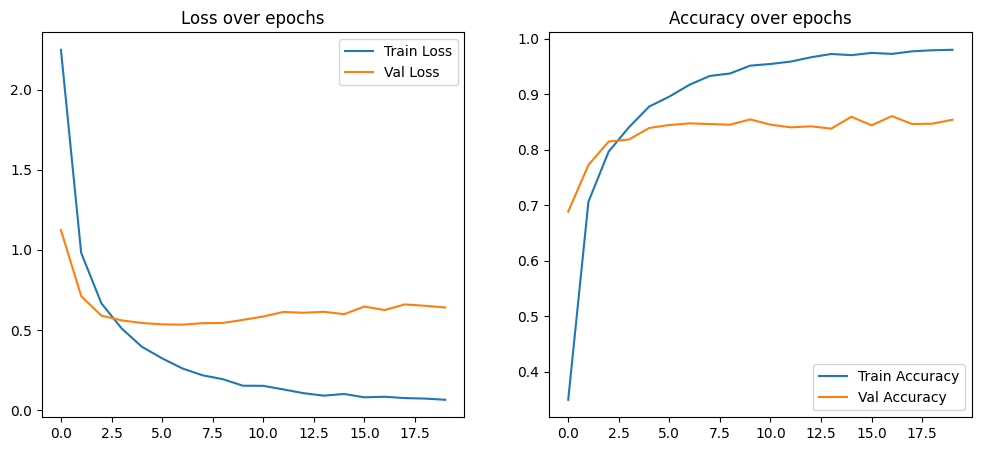

<ipython-input-13-f32aef18f5ba>:191: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


FileNotFoundError: [Errno 2] No such file or directory: 'best_model.pth'

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt

# Задаем параметры
train_dir = '/content/fr_train'
test_dir = '/content/fr_test'
batch_size = 32
num_epochs = 20
learning_rate = 0.0001
image_size = (300, 300)

# Калорийность для классов
calories_per_100g = {
    "apple_pie": 265, "baby_back_ribs": 381, "baklava": 428, "beef_tartare": 157,
    "bread_pudding": 350, "caesar_salad": 188, "caprese_salad": 142, "strawberry_shortcake": 274,
    "cannoli": 254, "waffles": 310, "breakfast_burrito": 225, "sushi": 157,
    "beef_carpaccio": 168, "spaghetti_bolognese": 260, "tiramisu": 283,
    "carrot_cake": 310, "steak": 230, "beignets": 399, "bibimbap": 146, "tacos": 216
}

# Аугментации для обучения
train_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Преобразования для тестирования
test_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Кастомный Dataset
class FoodDataset(Dataset):
    def __init__(self, dataset, calorie_dict, transform=None):
        self.dataset = dataset
        self.calorie_dict = calorie_dict
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        calories = self.calorie_dict.get(label, 0) / 100.0
        if self.transform:
            image = self.transform(image)
        return image, label, torch.tensor(calories, dtype=torch.float)

# Загрузка данных
train_dataset = datasets.ImageFolder(train_dir)
test_dataset = datasets.ImageFolder(test_dir)

# Обработка датасета
train_data = FoodDataset(train_dataset, calories_per_100g, transform=train_transforms)
test_data = FoodDataset(test_dataset, calories_per_100g, transform=test_transforms)

# Разделение данных
val_size = int(0.2 * len(train_data))
train_size = len(train_data) - val_size
train_data, val_data = random_split(train_data, [train_size, val_size])

# Даталоадеры
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Модель
class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FoodClassifier, self).__init__()
        self.features = models.efficientnet_b0(pretrained=True)
        in_features = self.features.classifier[1].in_features
        self.features.classifier = nn.Identity()

        self.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
        self.calorie_predictor = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.features(x)
        class_out = self.classifier(x)
        calorie_out = self.calorie_predictor(x)
        return class_out, calorie_out

# Подготовка модели
num_classes = len(calories_per_100g)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FoodClassifier(num_classes=num_classes).to(device)

criterion_class = nn.CrossEntropyLoss()
criterion_calorie = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Логирование истории
history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

# Функция оценки
def evaluate_model(loader):
    model.eval()
    all_preds, all_labels = [], []
    total_loss = 0

    with torch.no_grad():
        for images, labels, calories in loader:
            images, labels = images.to(device), labels.to(device)
            class_out, _ = model(images)

            loss = criterion_class(class_out, labels)
            total_loss += loss.item()

            _, preds = torch.max(class_out, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return acc, precision, recall, f1, total_loss / len(loader)

# Обучение
for epoch in range(num_epochs):
    model.train()
    running_loss, correct_preds = 0.0, 0

    for images, labels, calories in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        class_out, _ = model(images)

        loss = criterion_class(class_out, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(class_out, 1)
        correct_preds += (preds == labels).sum().item()

    train_acc = correct_preds / len(train_data)
    val_acc, val_precision, val_recall, val_f1, val_loss = evaluate_model(val_loader)

    history["train_loss"].append(running_loss / len(train_loader))
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {running_loss / len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")

# Графики
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss over epochs")

plt.subplot(1, 2, 2)
plt.plot(history["train_acc"], label="Train Accuracy")
plt.plot(history["val_acc"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()


In [ ]:
torch.save(model.state_dict(), 'best_model.pth')

In [ ]:

# Тестирование
model.load_state_dict(torch.load('best_model.pth'))
test_acc, test_precision, test_recall, test_f1, test_loss = evaluate_model(test_loader)
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Полный отчет
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels, _ in test_loader:
        images = images.to(device)
        class_out, _ = model(images)
        _, preds = torch.max(class_out, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


<ipython-input-15-485c3d1e55a6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Accuracy: 0.8580, Precision: 0.8598, Recall: 0.8580, F1: 0.8570
                           precision    recall  f1-score   support

           apple_pie_test       0.74      0.54      0.63       200
      baby_back_ribs_test       0.78      0.90      0.84       200
             baklava_test       0.84      0.86      0.85       200
      beef_carpaccio_test       0.93      0.89      0.91       200
        beef_tartare_test       0.84      0.84      0.84       200
            beignets_test       0.95      0.94      0.95       200
            bibimbap_test       0.96      0.92      0.94       200
       bread_pudding_test       0.68      0.77      0.72       200
   breakfast_burrito_test       0.82      0.87      0.85       200
        caesar_salad_test       0.90      0.94      0.92       200
             cannoli_test       0.92      0.82      0.87       200
       carpese_salad_test       0.89      0.93      0.91       200
         carrot_cake_test       0.88      0.77      0.82   